In [1]:
import pandas
!pip install statsmodels


# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely 
dataset


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


As you can see, we have the sizes of boots and harnesses for 50 avalanche dogs.

We want to use harness size to estimate boot size. This means harness_size is our input. We want a model that will process the input and make its own estimations of the boot size (output).

Select a model
The first thing we need to do is select a model. We're just getting started, so let's start with a very simple model called OLS. This is just a straight line (sometimes called a trendline).

Let's use an existing library to create our model, but we won't train it yet.

In [3]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

In [4]:
# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.5859254167382717
Line Intercept: 5.719109812682555


C:\Users\USER\AppData\Local\Temp\ipykernel_12272\3347697885.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line slope: {fitted_model.params[1]}\n"+
C:\Users\USER\AppData\Local\Temp\ipykernel_12272\3347697885.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line Intercept: {fitted_model.params[0]}")


C:\Users\USER\AppData\Local\Temp\ipykernel_12272\825871035.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')


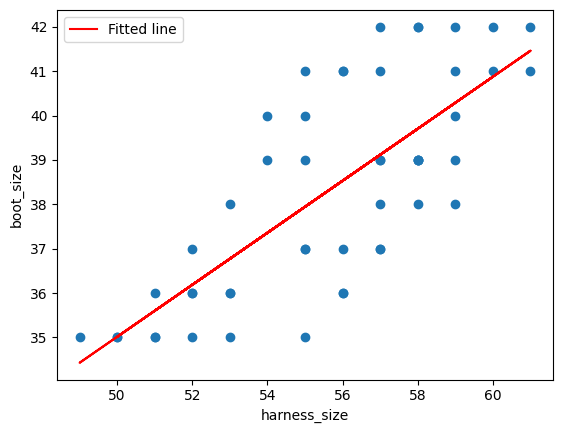

In [5]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

he preceding graph shows our original data as circles with a red line through it. The red line shows our model.

We can look at this line to understand our model. For example, we can see that as harness size increases, so does the estimated boot size.

Use the model
Now that we've finished training, we can use our model to predict a dog's boot size from their harness size.

For example, by looking at the red line, we can see that that a harness size of 52.5 (x axis) corresponds to a boot size of about 36.5 (y axis).

We don't have to do this by eye, though. We can use the model in our program to predict any boot size we like. Run the following code to see how we can use our model now that it's trained:

In [6]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144182


Visualize inputs and outputs

In [8]:
import pandas

# Read the text file containing data using pandas
dataset = pandas.read_csv('doggy_boot_harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


As you can see, this dataset contains information about dogs, including their doggy boot size, harness size, sex, and age in years.

Data is stored as columns and rows, similar to a table you might see in Excel.

Filter data by Columns
Data is easy to filter by columns. We can either type this directly, like dataset.my_column_name, or like so: dataset["my_column_name"].

We can use this to either extract data, or to delete data.

Let's take a look at the harness sizes, and delete the sex and age_years columns.

In [9]:

# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


As you can see, this dataset contains information about dogs, including their doggy boot size, harness size, sex, and age in years.

Data is stored as columns and rows, similar to a table you might see in Excel.


Filter data by Columns
Data is easy to filter by columns. We can either type this directly, like dataset.my_column_name, or like so: dataset["my_column_name"].

We can use this to either extract data, or to delete data.

Let's take a look at the harness sizes, and delete the sex and age_years columns.

In [10]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


We can also filter logically. For example, we can look at data for dogs who have a harness smaller than a size 55.

This works by calculating a True or False value for each row, then keeping only those rows where the value is True.

In [11]:
# Print how many rows of data we have
# The f-string is used to format the output, inserting the length of the dataset into the message.
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
# dataset.harness_size < 55 creates a series of True or False values for each row (dog) in the dataset. If the harness size is less than 55, it will be True; otherwise, it will be False.
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
# This applies the boolean mask is_small to the dataset. When you pass a boolean array (like is_small) to the DataFrame dataset, it keeps only the rows where the value in is_small is True.
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

In [12]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()
# dataset.boot_size < 40 creates a boolean mask, similar to the previous example, but this time checking for rows where the boot_size is less than 40.
# .copy() creates a new copy of the filtered dataset to avoid issues with "views" (i.e., changes to this new dataset won’t affect the original one). While this is optional in simpler operations, it can be helpful in more complex data manipulations to prevent unintended side effects.
# The resulting dataset data_smaller_paws now contains only rows for dogs with a boot size smaller than 40.
# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


Graph Data
Graphing your data is often the easiest way to understand it.

Lets make a simple graph of harness size versus boot size for our avalanche dogs with smaller feet.

Text(0, 0.5, 'boot_size')

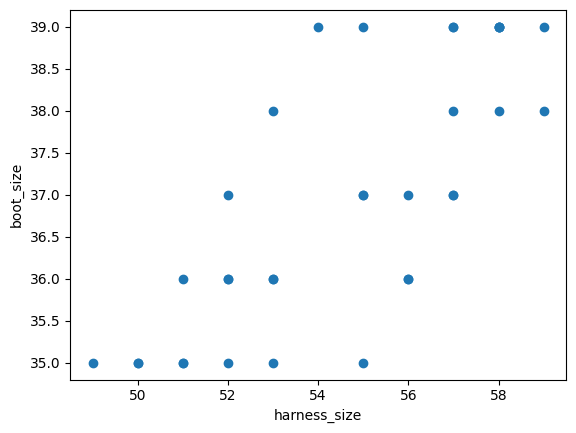

In [13]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt


# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# add labels
plt.xlabel("harness_size")
plt.ylabel("boot_size")

# The scatter plot will show the distribution of dogs' boot sizes (y-axis) as a function of their harness sizes (x-axis) for those with a boot size below 40.


Create New Columns

The preceding graph shows the relationship we want to investigate for our store, but some customers might want harness-size lists in inches, not centimeters. How can we view these harness sizes in imperial units?

To do this, we need to create a new column called harness_size_imperial and put that on the X axis instead.

Creating new columns uses very similar syntax to what we've seen before.

Text(0, 0.5, 'boot_size')

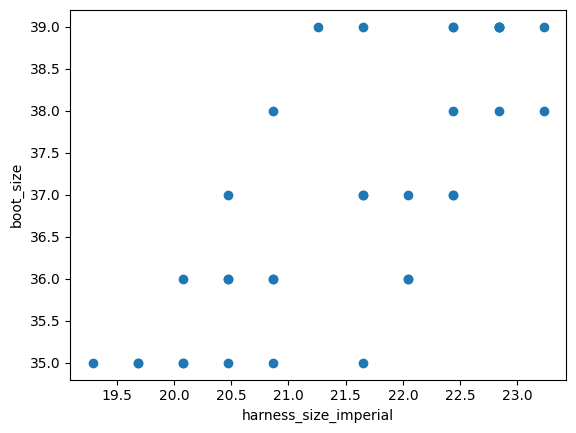

In [14]:
# Convert harness sizes from metric to imperial units 
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54
# This line converts the harness_size from centimeters to inches. Since 1 inch equals 2.54 centimeters, dividing the harness_size by 2.54 converts the value into inches.
# The converted values are stored in a new column called harness_size_imperial within the data_smaller_paws DataFrame.
# The new column contains the same values as harness_size, but in inches.
# Show a graph of harness size in imperial units
# This creates a scatter plot with the new harness_size_imperial on the x-axis and boot_size on the y-axis.
# Each point in the graph represents a dog from the data_smaller_paws dataset, where its boot size is plotted against its harness size in inches.
plt.scatter(data_smaller_paws["harness_size_imperial"], data_smaller_paws["boot_size"])
plt.xlabel("harness_size_imperial")
plt.ylabel("boot_size")

# Result:
# This scatter plot will help visualize the relationship between the converted harness sizes (inches) and boot sizes (centimeters).
# The new column harness_size_imperial will store the harness sizes in inches, making it easier to work with imperial units for further analysis or reporting.







Exercise: Using a Trained Model on New Data

In Unit 3, we created a basic model that let us find the relationship between a dog's harness size and their boot size. We showed we could then use this model to make a prediction about a new, previously unseen dog.

It's common to build, train, then use a model while we're just learning about machine learning; but in the real world, we don't want to train the model every time we want to make a prediction.

Consider our avalanche-dog equipment store scenario:

We want to train the model just once, then load that model onto the server that runs our online store.
Although the model is trained on a dataset we downloaded from the internet, we actually want to use it to estimate the boot size of our customers' dogs who aren't in this dataset!
How can we do this?

Here, we'll:

Create a basic model.
Save it to disk.
Load it from disk.
Use it to make predictions about a dog who was not in the training dataset.
Load the dataset
Let's begin by opening the dataset from file.

In [16]:
import pandas

# Load a file containing dog's boot and harness sizes
data = pandas.read_csv('doggy_boot_harness.csv')

# Print the first few rows
data.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


Create and train a model

As we've done before, we create a simple Linear Regression model and train it on our dataset.

In [17]:
import statsmodels.formula.api as smf

# Fit a simple model that finds a linear relationship
# between boot size and harness size, which we can use later
# to predict a dog's boot size, given their harness size
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()

print("Model trained!")

Model trained!


smf.ols() is used to define the OLS regression model.

The formula = "boot_size ~ harness_size" tells the model that boot_size is the dependent variable (the one we are trying to predict), and harness_size is the independent variable (the one we use to make the prediction).

data = data indicates that the input data (likely the dataset) is passed into the model.

.fit() fits the model to the data, meaning it finds the best-fitting linear equation that describes the relationship between boot_size and harness_size based on the dataset.

What Does the Model Do?
Linear Relationship: The model finds the best-fitting line that predicts the boot_size of a dog based on its harness_size. This means that, once trained, you can use this model to predict a dog's boot size given only the harness size.
Equation: Behind the scenes, the model calculates an equation of the form: \text{boot_size} = \beta_0 + \beta_1 \times \text{harness_size} Where:
𝛽
0
β 
0
​
  is the intercept (the value of boot_size when harness_size is 0).
𝛽
1
β 
1
​
  is the slope (the change in boot_size for each unit increase in harness_size).
Use Cases for This Model:
Prediction: After training, this model can be used to predict the boot size of dogs based on their harness size. For example, if you know a dog's harness size, you can predict its boot size using the trained model.
Insights: The model can provide insights into how strongly harness_size influences boot_size. You could interpret the slope 
𝛽
1
β 
1
​
  to understand how much boot size changes with a change in harness size.


Save and load a model

Our model is ready to use, but we don't need it yet. Let's save it to disk.

In [18]:
import joblib

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)

print("Model saved!")

Model saved!


In [19]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


Put it together

On our website, we want to take the harness of our customer's dog, then calculate their dog's boot size using the model that we've already trained.

Let's put everything here together to make a function that loads the model from disk, then uses it to predict our customer's dog's boot size.